<a href="https://colab.research.google.com/github/Sourav61/Sparks-Foundation-Task-2/blob/main/Task_2_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<h1><b>Author: Sourav Pahwa</b></h1>
<h2>GRIPMAY2021 - The Sparks Foundation - Data Science & Business Analytics Internship</h2>
<h3><b>Task-2 : Prediction using Unsupervised Machine Learning</b></h3>
<ul style="list-style-type:square"><h4><li>From the given ‘Iris’ dataset, predict the optimum number of clusters 
and represent it visually.</li></h4></ul>

In [ ]:
#importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [ ]:
#importing the given data
Data = pd.read_csv("Iris.csv")

print("Data imported successfully")
#Checking the Shape of the data
print(Data.shape)
#getting info about data
Data.info()

Data imported successfully
(150, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


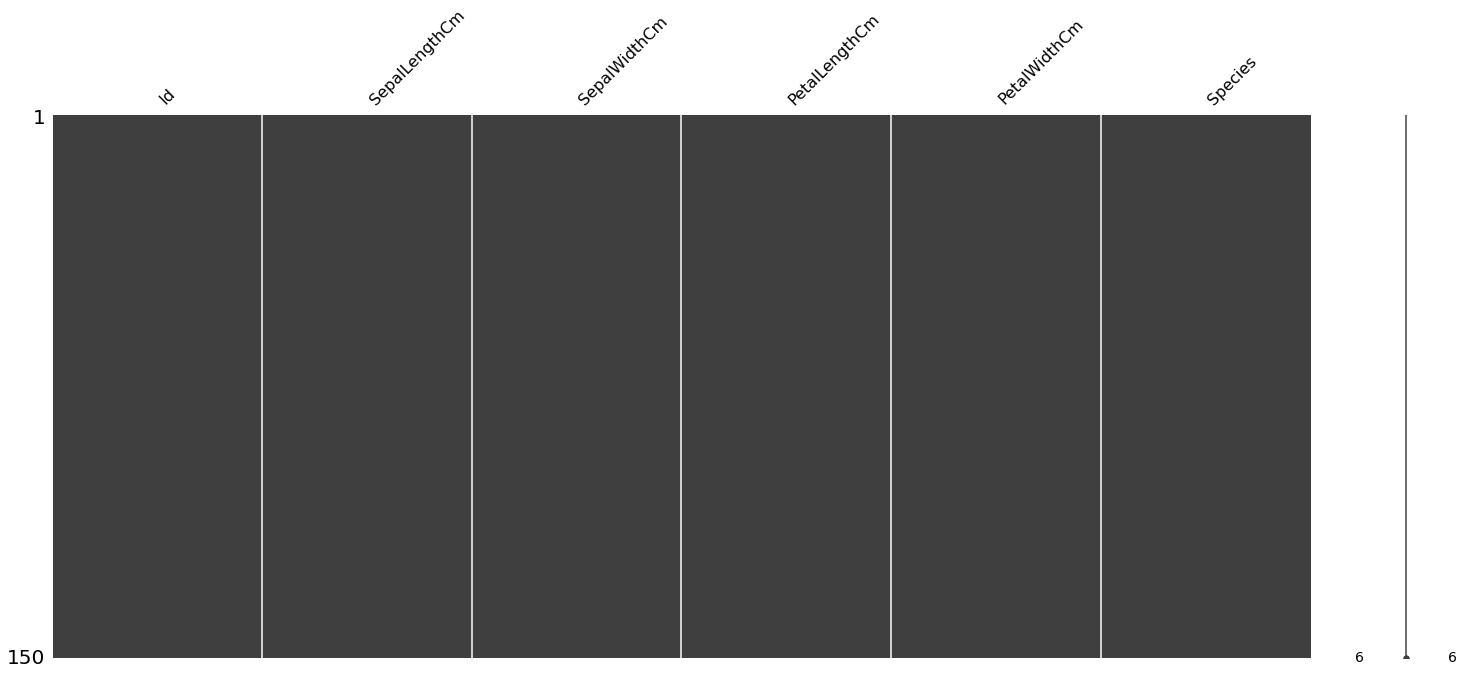

In [ ]:
#Here we are visualising the null values.

msno.matrix(Data.sample(150))

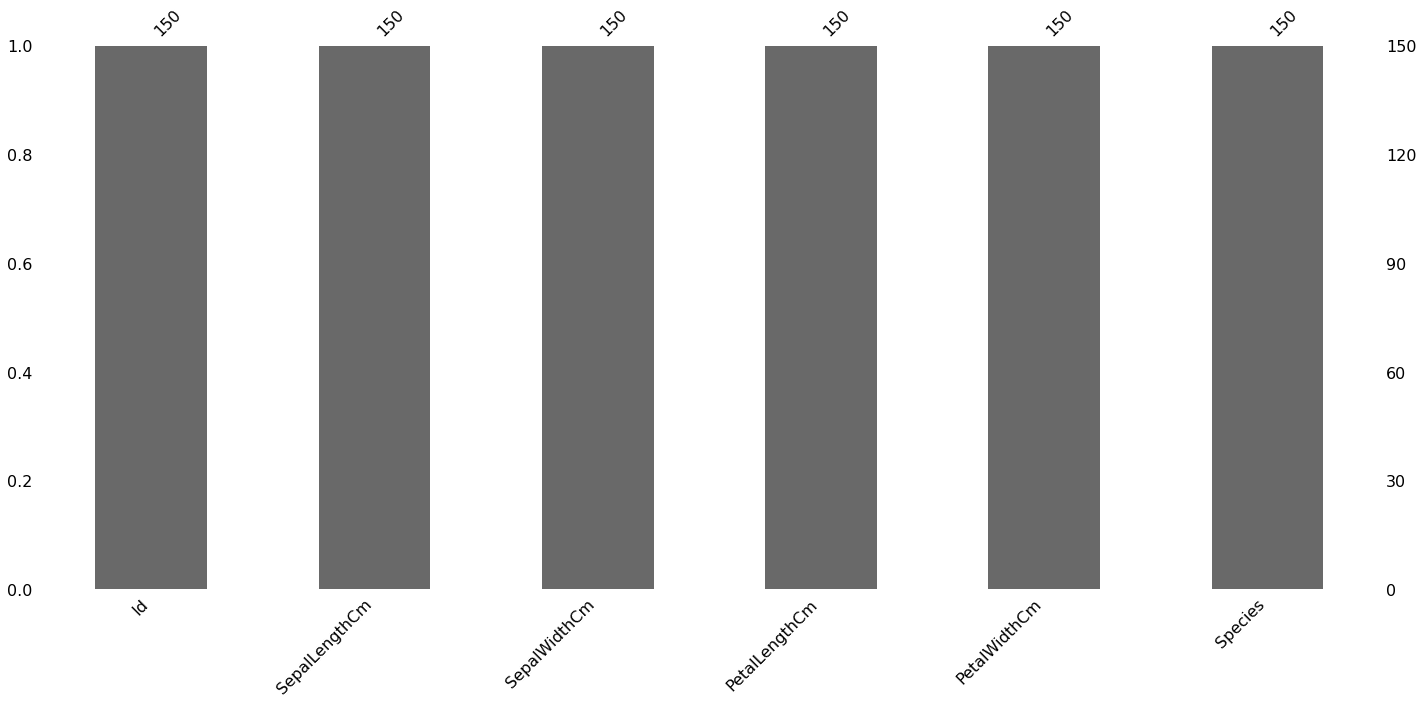

In [ ]:
msno.bar(Data.sample(150))

In [ ]:
#Species is dropped from our dataset
Data.drop(['Species'],axis=1,inplace=True)
#Id is also dropped from our dataset
Data.drop(['Id'],axis=1,inplace=True)

In [ ]:
#We are looking at the first 10 values of our dataset
print(Data.head(10))
#We are looking at the last 10 values of our dataset
Data.tail(10)

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2
5            5.4           3.9            1.7           0.4
6            4.6           3.4            1.4           0.3
7            5.0           3.4            1.5           0.2
8            4.4           2.9            1.4           0.2
9            4.9           3.1            1.5           0.1


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
140,6.7,3.1,5.6,2.4
141,6.9,3.1,5.1,2.3
142,5.8,2.7,5.1,1.9
143,6.8,3.2,5.9,2.3
144,6.7,3.3,5.7,2.5
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [ ]:
#Inspecting the dataframe
# This function displays the datatype,levels 0f variables and number of levels in each column of the given Iris dataframe.Here lambda is used to pass arguments

def inspect(data):
    return pd.DataFrame({"Data Type":data.dtypes,"No of Levels":data.apply(lambda x: x.nunique(),axis=0), "Levels":data.apply(lambda x: str(x.unique()),axis=0)})
inspect(Data)

,Data Type,No of Levels,Levels
SepalLengthCm,float64,35,[5.1 4.9 4.7 4.6 5. 5.4 4.4 4.8 4.3 5.8 5.7 5...
SepalWidthCm,float64,23,[3.5 3. 3.2 3.1 3.6 3.9 3.4 2.9 3.7 4. 4.4 3...
PetalLengthCm,float64,43,[1.4 1.3 1.5 1.7 1.6 1.1 1.2 1. 1.9 4.7 4.5 4...
PetalWidthCm,float64,22,[0.2 0.4 0.3 0.1 0.5 0.6 1.4 1.5 1.3 1.6 1. 1...


In [ ]:
#Here we are analysing our dataset mathematically. 

Data.describe(include='all')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


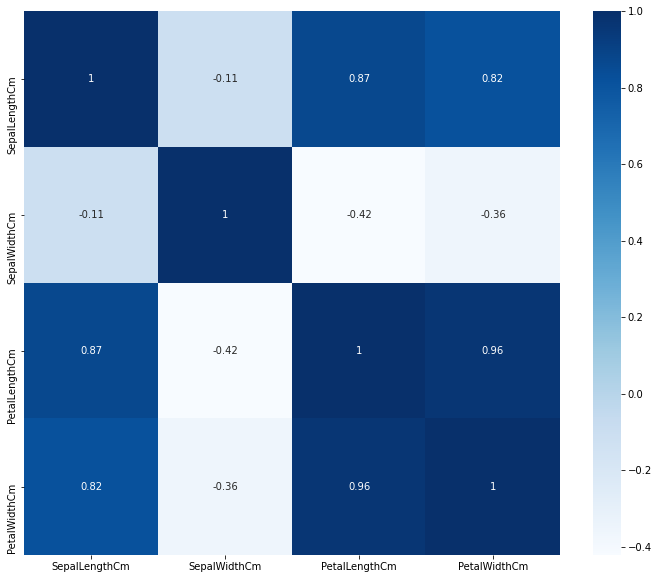

In [ ]:
#Here we are looking at the correlation between various entities in our dataset

fig = plt.figure(figsize = (12,10))
sns.heatmap(Data.corr(), cmap='Blues', annot = True) 

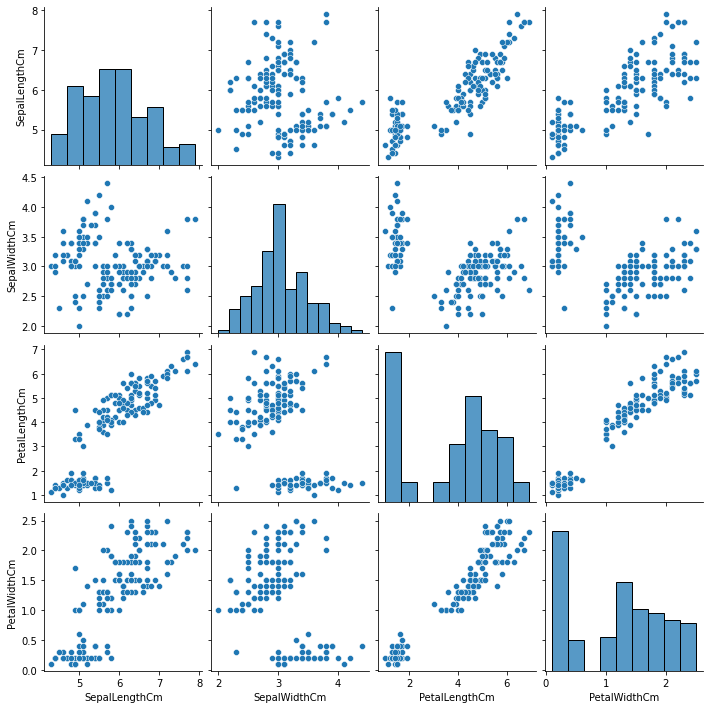

In [ ]:
# Creating a pairplot with hue defined by Clicked on Ad column
sns.pairplot(Data, vars = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'], palette = 'husl')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

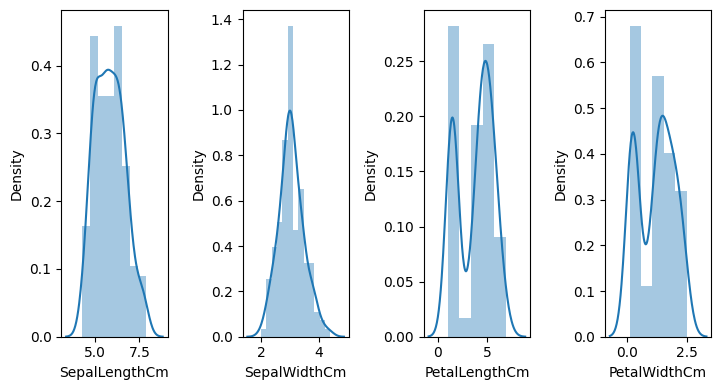

In [ ]:
#checking the distribution of highly correlated numerical features with different variables
cols = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
plt.figure(figsize=(20,4), dpi=100)
i = 1
for col in cols:
    plt.subplot(1,11,i)
    sns.distplot(Data[col])
    i = i+1
plt.tight_layout()
plt.show()

In [ ]:
# Finding the optimum number of clusters for k-means classification

x = Data.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
a = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    a.append(kmeans.inertia_)

<b>We plot reduction in variance,for per value of k on that basis we plot one graph in which on y axis there is reduction in variance and on x axis there is no. of clusters.This method is known as elbow method.</b>

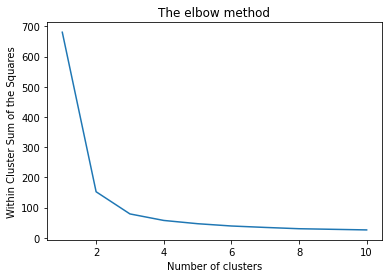

In [ ]:
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), a)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Within Cluster Sum of the Squares')
plt.show()

In [ ]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

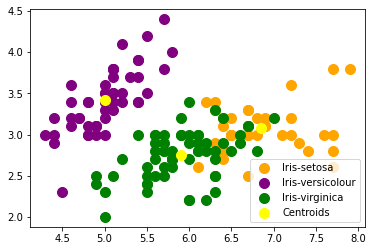

In [ ]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'orange', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'purple', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

#plt.show()
plt.legend()